In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv("MNIST_dataset/data.csv")

In [3]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data = np.array(data)
n, m = data.shape
np.random.shuffle(data)
print(f"Number of rows: {n}, Number of columns: {m}")

Number of rows: 42000, Number of columns: 785


Dataset was split into training and validation subsets. 1000 validation images.
The neural network was trained only on the training set, while all final performance metrics were computed on the unseen validation set, ensuring unbiased evaluation and generalization capability of the model.

In [41]:
data_test = data[0:1000].T # 1000 out of 42000 are validation examples
Y_test = data_test[0] # first row are labels (digits 0-9)
X_test = data_test[1:m] # pixes values 0-255
X_test = X_test / 255 # normalize values to [0,1]

data_train = data[1000:n].T
Y_train = data_train[0]
X_train = data_train[1:m]
X_train = X_train / 255

In [6]:
def init_params():
    W1 = np.random.randn(128, 784) * np.sqrt(2 / 784)
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * np.sqrt(2 / 128)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(x):
    return np.maximum(0, x)

def softmax(Z):
    shifted = Z - np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(shifted)
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [7]:
def one_hot(Y):
    one_hot_Y = np.zeros((10, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def deriv_ReLU(x):
    return x > 0

def backward_propagation(Z1, A1, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / Y.size * dZ2.dot(A1.T)
    db2 = 1 / Y.size * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / Y.size * dZ1.dot(X.T)
    db1 = 1 / Y.size * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [19]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(output):
    return np.argmax(output, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def fit(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration number: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [20]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]

    print("Prediction:", prediction)
    print("Label:", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

A subset of 5,000 images was selected from the original 41,000-image dataset for training due to computational limitations. Learning rate is set to 0.01

In [21]:
W1, b1, W2, b2 = fit(X_train, Y_train, 5000, 0.01)

Iteration number:  0
Accuracy:  0.07760975609756098
Iteration number:  100
Accuracy:  0.6445609756097561
Iteration number:  200
Accuracy:  0.7630731707317073
Iteration number:  300
Accuracy:  0.809439024390244
Iteration number:  400
Accuracy:  0.8328780487804878
Iteration number:  500
Accuracy:  0.8469512195121951
Iteration number:  600
Accuracy:  0.856390243902439
Iteration number:  700
Accuracy:  0.8646341463414634
Iteration number:  800
Accuracy:  0.8698048780487805
Iteration number:  900
Accuracy:  0.8748048780487805
Iteration number:  1000
Accuracy:  0.878780487804878
Iteration number:  1100
Accuracy:  0.8819756097560976
Iteration number:  1200
Accuracy:  0.8849756097560976
Iteration number:  1300
Accuracy:  0.8877317073170732
Iteration number:  1400
Accuracy:  0.8896341463414634
Iteration number:  1500
Accuracy:  0.892
Iteration number:  1600
Accuracy:  0.894
Iteration number:  1700
Accuracy:  0.8959512195121951
Iteration number:  1800
Accuracy:  0.8975609756097561
Iteration numb

Prediction: [5]
Label: 5


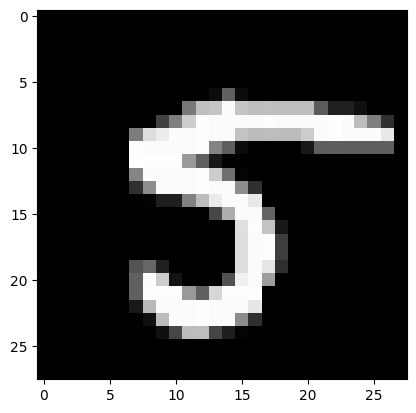

In [22]:
test_prediction(32, W1, b1, W2, b2)

In [24]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

np.float64(0.921)

### Mini-batch Training
Next model was trained using a mini-batch gradient descent with a batch size of 64. After only 250 epochs, the achieved accuracy was 99.75%.

In [32]:
def fit(X, Y, iterations, alpha, batch_size):
    W1, b1, W2, b2 = init_params()

    for epoch in range(iterations):
        for j in range(0, Y.size, batch_size):
            X_batch = X[:, j:j+batch_size]
            Y_batch = Y[j:j+batch_size]
            Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X_batch)
            dW1, db1, dW2, db2 = backward_propagation(Z1, A1, A2, W2, X_batch, Y_batch)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if epoch % 25 == 0:
            _, _, _, A2_full = forward_propagation(W1, b1, W2, b2, X)
            accuracy = get_accuracy(get_predictions(A2_full), Y)
            print(f"Iteration number: {epoch}")
            print(f"Accuracy: {accuracy}")
    return W1, b1, W2, b2

In [33]:
W1, b1, W2, b2 = fit(X_train, Y_train, 250, 0.01, 64)

Iteration number: 0
Accuracy: 0.8605365853658536
Iteration number: 25
Accuracy: 0.9552682926829268
Iteration number: 50
Accuracy: 0.9716585365853658
Iteration number: 75
Accuracy: 0.9808048780487805
Iteration number: 100
Accuracy: 0.9862926829268293
Iteration number: 125
Accuracy: 0.9903170731707317
Iteration number: 150
Accuracy: 0.9929756097560976
Iteration number: 175
Accuracy: 0.995219512195122
Iteration number: 200
Accuracy: 0.9963414634146341
Iteration number: 225
Accuracy: 0.9973414634146341


#### Now we evaluate the model on 30,000 samples it has never seen before

In [44]:
data_test = data[10000:40000].T
Y_test = data_test[0]
X_test = data_test[1:m]
X_test = X_test / 255

test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

np.float64(0.9975)